<a href="https://colab.research.google.com/github/CPTR295/ML1/blob/main/NeuralNetsWithKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import numpy as np

import os
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.19.0'

In [ ]:
keras.__version__

'3.10.0'

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X=iris.data[:,(2,3)]
y=(iris.target==0).astype(np.int32)

per_clf=Perceptron(max_iter=1000,tol=1e-3,random_state=42)
per_clf.fit(X,y)
per_clf.predict([[2,0.5]])

array([1], dtype=int32)

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_valid,X_train = X_train_full[:5000]/255.,X_train_full[5000:]/255 #Scaling pixel to 0-1 by divding it by 255
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255

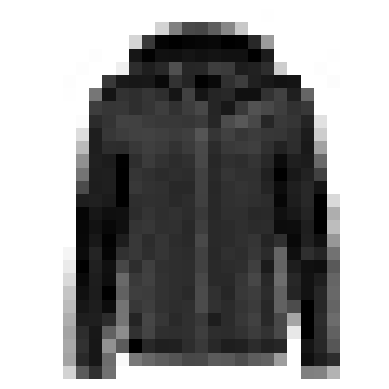

In [ ]:
plt.imshow(X_train[0],cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Sequential model - Where we declare all layers in linear fashion

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu')) #300 neurons and alg to radjust wieghts
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax')) #10 classes and we dont want proba

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

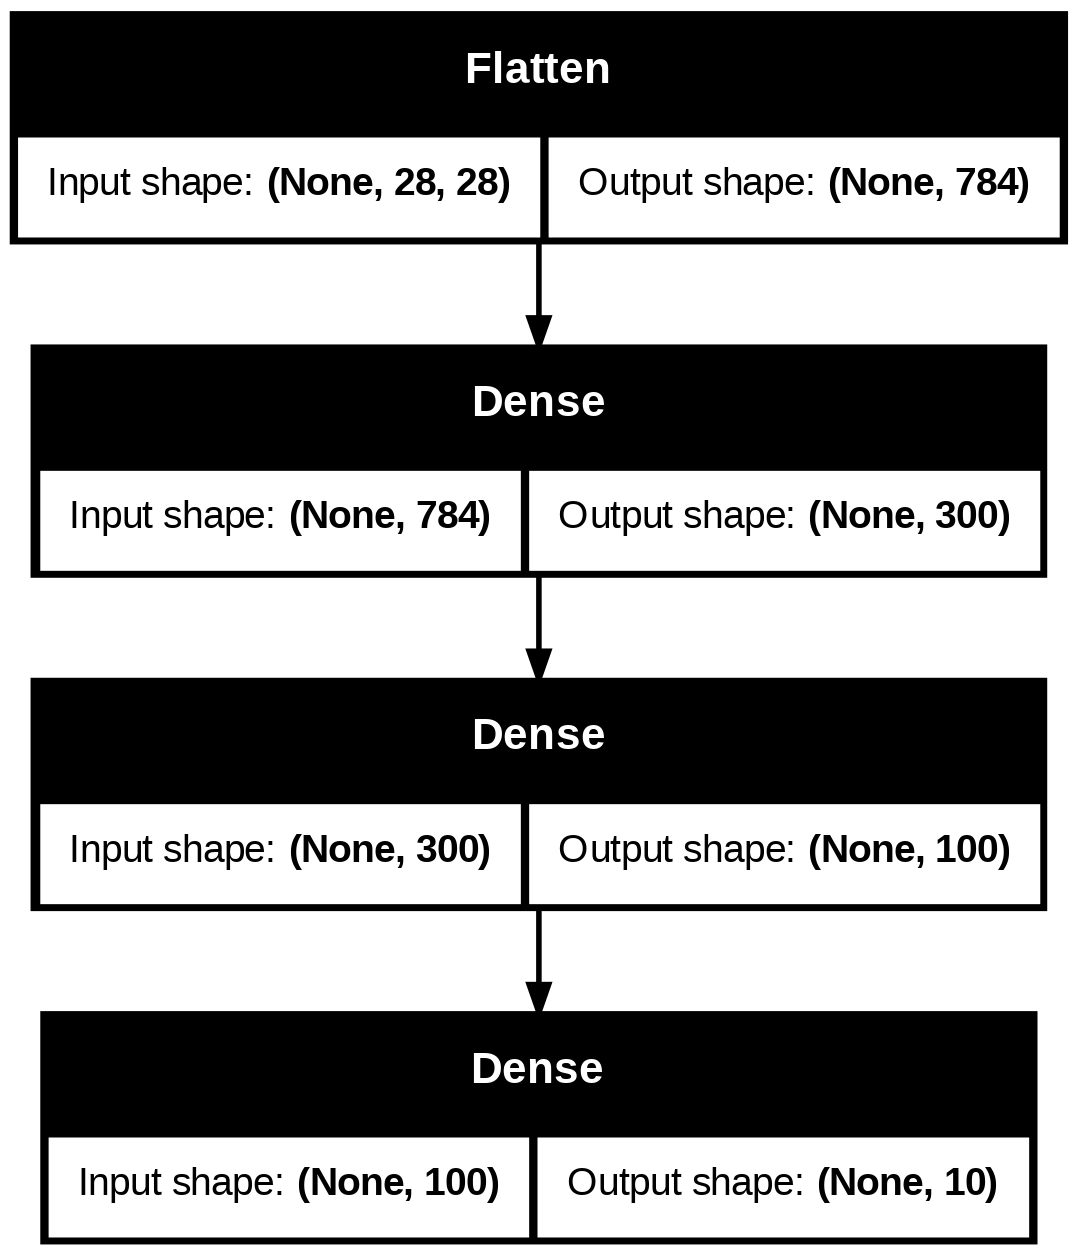

In [ ]:
keras.utils.plot_model(model,"model.png",show_shapes=True)

In [ ]:
hidden1=model.layers[1]
hidden1.name

'dense'

In [ ]:
weights,biases = hidden1.get_weights()

In [ ]:
weights

array([[-0.03359929,  0.06344473, -0.01114425, ..., -0.01811773,
         0.00301134, -0.03968414],
       [ 0.02942637,  0.00482535, -0.00537338, ..., -0.05493282,
        -0.070536  ,  0.02207472],
       [-0.0132596 ,  0.05229414, -0.04818944, ..., -0.01849045,
         0.03847113,  0.03940631],
       ...,
       [ 0.05376361,  0.07094873,  0.01720444, ...,  0.0162447 ,
         0.01722439, -0.05849985],
       [ 0.0173669 , -0.02899758,  0.01201332, ..., -0.05114235,
        -0.03134091, -0.04331103],
       [ 0.00209223,  0.05345209,  0.06622989, ..., -0.05075965,
         0.03782047, -0.035485  ]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=33,validation_data=(X_valid,y_valid))

Epoch 1/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9242 - loss: 0.2158 - val_accuracy: 0.8906 - val_loss: 0.3002
Epoch 2/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9225 - loss: 0.2174 - val_accuracy: 0.8878 - val_loss: 0.3017
Epoch 3/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9249 - loss: 0.2103 - val_accuracy: 0.8866 - val_loss: 0.3063
Epoch 4/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9228 - loss: 0.2142 - val_accuracy: 0.8870 - val_loss: 0.3050
Epoch 5/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9275 - loss: 0.2057 - val_accuracy: 0.8964 - val_loss: 0.2949
Epoch 6/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9260 - loss: 0.2061 - val_accuracy: 0.8848 - val_loss: 0.3017
Epoch 7/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9310 - loss: 0.1993 - val_accuracy: 0.8974 - val_loss: 0.2918
Epoch 8/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9295 - loss: 0.1960 - 

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 33, 'steps': 1719}

In [ ]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

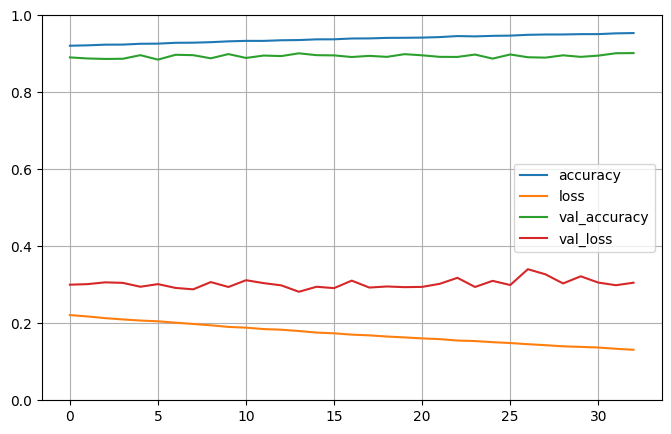

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0969 - loss: 3.1440


[3.1339030265808105, 0.10000000149011612]

In [ ]:
X_new=X_test[:3]
y_proba= model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0.11, 0.02, 0.05, 0.08, 0.01, 0.43, 0.12, 0.18, 0.01, 0.  ],
       [0.12, 0.02, 0.06, 0.08, 0.01, 0.4 , 0.13, 0.17, 0.01, 0.  ],
       [0.13, 0.02, 0.05, 0.09, 0.01, 0.39, 0.12, 0.18, 0.01, 0.  ]],
      dtype=float32)

In [ ]:
y_pred=np.argmax(model.predict(X_new),axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([5, 5, 5])

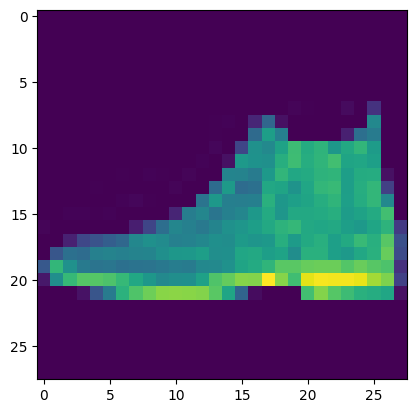

In [ ]:
plt.imshow(X_new[0])
plt.show()

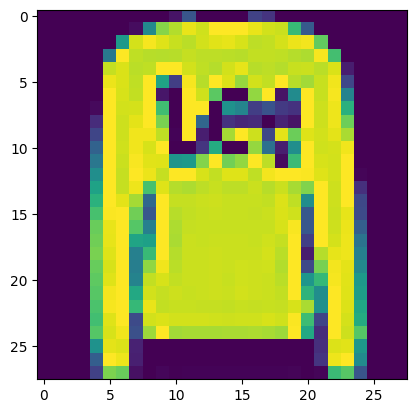

In [ ]:
plt.imshow(X_new[1])
plt.show()

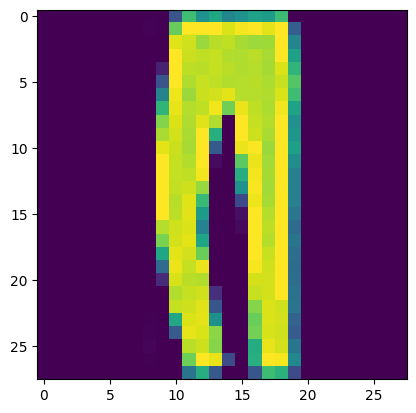

In [ ]:
plt.imshow(X_new[2])
plt.show()

Regression MLP

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

HTTPError: HTTP Error 403: Forbidden